In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,classification_report

In [2]:
sample_df = pd.read_csv('Sample.csv')
train_df = pd.read_csv('Train.csv',encoding='latin-1')
test_df = pd.read_csv('Test.csv',encoding='latin-1')
train_df = train_df.dropna(subset=['IS_HCP'])

In [3]:
train_df.IS_HCP = train_df.IS_HCP.astype('int')


In [4]:
train_df.IS_HCP.value_counts()

IS_HCP
0    79756
1    34180
Name: count, dtype: int64

<Axes: xlabel='IS_HCP', ylabel='count'>

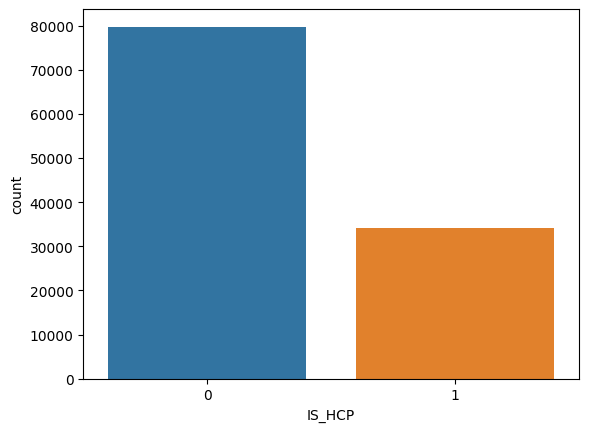

In [5]:
sns.countplot(data=train_df, x='IS_HCP')

In [6]:
train_df = train_df.dropna(subset=['USERPLATFORMUID','USERAGENT'])

In [7]:
df = pd.concat([train_df,test_df])

In [8]:
df.nunique()

ID                 142423
DEVICETYPE              4
PLATFORM_ID            15
BIDREQUESTIP        37055
USERPLATFORMUID     63423
USERCITY             4547
USERZIPCODE         11810
USERAGENT            4626
PLATFORMTYPE            5
CHANNELTYPE             1
URL                  5672
KEYWORDS             2548
TAXONOMY              207
IS_HCP                  2
dtype: int64

In [9]:
df=df.drop(['TAXONOMY','CHANNELTYPE'],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142423 entries, 0 to 28492
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               142423 non-null  int64  
 1   DEVICETYPE       142423 non-null  object 
 2   PLATFORM_ID      142423 non-null  int64  
 3   BIDREQUESTIP     142423 non-null  object 
 4   USERPLATFORMUID  142423 non-null  object 
 5   USERCITY         134506 non-null  object 
 6   USERZIPCODE      136717 non-null  float64
 7   USERAGENT        142422 non-null  object 
 8   PLATFORMTYPE     142423 non-null  object 
 9   URL              142423 non-null  object 
 10  KEYWORDS         142423 non-null  object 
 11  IS_HCP           113930 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 14.1+ MB


In [11]:
df.nunique()

ID                 142423
DEVICETYPE              4
PLATFORM_ID            15
BIDREQUESTIP        37055
USERPLATFORMUID     63423
USERCITY             4547
USERZIPCODE         11810
USERAGENT            4626
PLATFORMTYPE            5
URL                  5672
KEYWORDS             2548
IS_HCP                  2
dtype: int64

In [12]:
numerical_cols = [cols for cols in df.columns if df[cols].dtype in ['int64','float64']]
numerical_cols.remove('IS_HCP')

In [13]:
df[numerical_cols].isnull().sum()

ID                0
PLATFORM_ID       0
USERZIPCODE    5706
dtype: int64

In [14]:
df['USERZIPCODE_flag'] = df['USERZIPCODE'].isnull().astype(int)

In [15]:
df[numerical_cols] =  df[numerical_cols].fillna(df[numerical_cols].mode().iloc[0])

In [16]:
categorical_cols = [cols for cols in df.columns if df[cols].dtype == 'object']

In [17]:
df[categorical_cols].nunique()

DEVICETYPE             4
BIDREQUESTIP       37055
USERPLATFORMUID    63423
USERCITY            4547
USERAGENT           4626
PLATFORMTYPE           5
URL                 5672
KEYWORDS            2548
dtype: int64

In [18]:
df[categorical_cols].isnull().sum()

DEVICETYPE            0
BIDREQUESTIP          0
USERPLATFORMUID       0
USERCITY           7917
USERAGENT             1
PLATFORMTYPE          0
URL                   0
KEYWORDS              0
dtype: int64

In [19]:
mapping = df.groupby('USERZIPCODE')['USERCITY'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else None).to_dict()
df['USERCITY'] = df['USERCITY'].fillna(df['USERZIPCODE'].map(mapping))



In [20]:
df['USERCITY_flag'] = df['USERCITY'].isnull().astype(int)

In [21]:
df[categorical_cols]=df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [22]:
df.isnull().sum()

ID                      0
DEVICETYPE              0
PLATFORM_ID             0
BIDREQUESTIP            0
USERPLATFORMUID         0
USERCITY                0
USERZIPCODE             0
USERAGENT               0
PLATFORMTYPE            0
URL                     0
KEYWORDS                0
IS_HCP              28493
USERZIPCODE_flag        0
USERCITY_flag           0
dtype: int64

In [23]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [24]:
df_train = df[~np.isnan(df['IS_HCP'])]
df_test = df[np.isnan(df['IS_HCP'])]


In [25]:
y = df_train['IS_HCP']
X = df_train.drop(['IS_HCP','ID'],axis=1).copy()

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=4)

In [27]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
# from sklearn.ensemble import GradientBoostingClassifier

In [28]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# bnb = BernoulliNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# gbdt = GradientBoostingClassifier(n_estimators=100,random_state=42)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)



In [29]:
rfc = RandomForestClassifier(n_estimators=200, random_state=4)
bc = BaggingClassifier(n_estimators=200, random_state=4, max_samples=0.9, max_features=0.9)
etc = ExtraTreesClassifier(n_estimators=200, random_state=4)
xgb = XGBClassifier(n_estimators=200,random_state=4,learning_rate=0.1,max_depth=25)

In [30]:
clfs = {
    # 'SVC' : svc,
    # 'KNN' : knc, 
    # 'MNB': mnb,
    # 'BNB': bnb,
    # 'DT': dtc, 
    # 'LR': lrc, 
    'RF': rfc, 
    # 'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    # 'GBDT':gbdt,
    'xgb':xgb
}

In [31]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,zero_division=1,average='weighted')
    
    return accuracy,precision

In [32]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  RF
Accuracy -  0.9916910473961381
Precision -  0.9917070463334671
For  BgC
Accuracy -  0.9941486249268578
Precision -  0.9941478307960501
For  ETC
Accuracy -  0.98765359859567
Precision -  0.9877186624808254
For  xgb
Accuracy -  0.9953774136922177
Precision -  0.9953755452910003


In [33]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
3,xgb,0.995377,0.995376
1,BgC,0.994149,0.994148
0,RF,0.991691,0.991707
2,ETC,0.987654,0.987719


In [34]:
from sklearn.ensemble import StackingClassifier
estimators=[('BgC', bc), ('etc', etc), ('xgb', xgb),('rfc',rfc)]
final_estimator=RandomForestClassifier(n_estimators=200,random_state=4)
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9956699824458748
Precision 0.9923857868020305


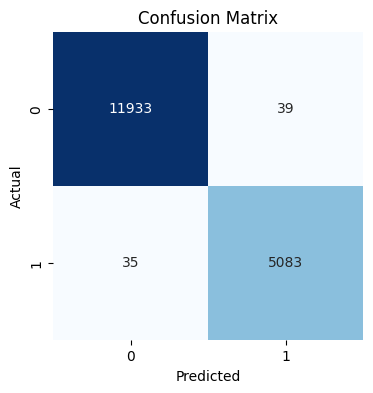

In [35]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11972
         1.0       0.99      0.99      0.99      5118

    accuracy                           1.00     17090
   macro avg       0.99      0.99      0.99     17090
weighted avg       1.00      1.00      1.00     17090



In [37]:
df_test_processing = df_test.drop(['IS_HCP','ID'],axis=1).copy()
df_test['IS_HCP']=clf.predict(df_test_processing)
submission = df_test[['ID','IS_HCP']]
submission.to_csv('output.csv',index=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13972\3334368815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['IS_HCP']=clf.predict(df_test_processing)


In [68]:
submission.head()

,ID,IS_HCP
0,115501,0.0
1,115502,1.0
2,115503,0.0
3,115504,0.0
4,115505,1.0


In [38]:
submission.shape

(28493, 2)

In [39]:
df_train.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,URL,KEYWORDS,IS_HCP,USERZIPCODE_flag,USERCITY_flag
0,1001,0,2,7193,26134,3276,97206.0,3100,3,746,474,0.0,0,0
1,1002,0,2,21233,47841,132,22202.0,2913,3,789,111,0.0,0,0
2,1003,0,2,21727,41220,2783,83654.0,2913,3,746,474,0.0,0,0
3,1004,0,3,4614,17268,3867,229114624.0,3191,3,394,282,1.0,0,1
4,1005,1,7,11083,39893,1821,77008.0,4371,3,1763,266,0.0,0,0


In [40]:
train_df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0


In [41]:
df_train['TAXONOMY'] = train_df['TAXONOMY']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13972\920785426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['TAXONOMY'] = train_df['TAXONOMY']


In [42]:
df_train.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,URL,KEYWORDS,IS_HCP,USERZIPCODE_flag,USERCITY_flag,TAXONOMY
0,1001,0,2,7193,26134,3276,97206.0,3100,3,746,474,0.0,0,0,NaN
1,1002,0,2,21233,47841,132,22202.0,2913,3,789,111,0.0,0,0,NaN
2,1003,0,2,21727,41220,2783,83654.0,2913,3,746,474,0.0,0,0,NaN
3,1004,0,3,4614,17268,3867,229114624.0,3191,3,394,282,1.0,0,1,2084P0800X
4,1005,1,7,11083,39893,1821,77008.0,4371,3,1763,266,0.0,0,0,NaN


In [43]:
df_train.loc[train_df['IS_HCP'] == 0, 'TAXONOMY'] = '0'

In [44]:
df_train.isnull().sum()

ID                     0
DEVICETYPE             0
PLATFORM_ID            0
BIDREQUESTIP           0
USERPLATFORMUID        0
USERCITY               0
USERZIPCODE            0
USERAGENT              0
PLATFORMTYPE           0
URL                    0
KEYWORDS               0
IS_HCP                 0
USERZIPCODE_flag       0
USERCITY_flag          0
TAXONOMY            1867
dtype: int64

In [45]:
df_train.nunique()

ID                  113930
DEVICETYPE               4
PLATFORM_ID             15
BIDREQUESTIP         33660
USERPLATFORMUID      53778
USERCITY              4420
USERZIPCODE          11278
USERAGENT             4288
PLATFORMTYPE             5
URL                   5229
KEYWORDS              2458
IS_HCP                   2
USERZIPCODE_flag         2
USERCITY_flag            2
TAXONOMY               208
dtype: int64

In [46]:
df_train['TAXONOMY'].value_counts()

TAXONOMY
0             79754
2084P0800X     7928
2084N0400X     6621
207Q00000X     3997
207R00000X     3190
              ...  
163WC0400X        1
246QM0706X        1
1835N1003X        1
207RI0008X        1
207XX0801X        1
Name: count, Length: 208, dtype: int64

In [47]:
df_train.isnull().sum()

ID                     0
DEVICETYPE             0
PLATFORM_ID            0
BIDREQUESTIP           0
USERPLATFORMUID        0
USERCITY               0
USERZIPCODE            0
USERAGENT              0
PLATFORMTYPE           0
URL                    0
KEYWORDS               0
IS_HCP                 0
USERZIPCODE_flag       0
USERCITY_flag          0
TAXONOMY            1867
dtype: int64

In [48]:
df_train['TAXONOMY']=df_train['TAXONOMY'].fillna(df_train['TAXONOMY'].mode().iloc[0])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13972\3559284948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['TAXONOMY']=df_train['TAXONOMY'].fillna(df_train['TAXONOMY'].mode().iloc[0])


In [49]:
df_test.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,URL,KEYWORDS,IS_HCP,USERZIPCODE_flag,USERCITY_flag
0,115501,0,2,32158,3285,1290,28305.0,2706,3,941,420,0.0,0,0
1,115502,1,2,16245,49641,826,16316.0,4159,3,4739,464,1.0,0,0
2,115503,0,2,7458,15080,881,91724.0,2863,3,4777,0,0.0,0,0
3,115504,0,7,25932,15468,477,11226.0,2899,3,1439,545,0.0,0,0
4,115505,0,2,30838,58515,2399,30062.0,3011,3,5163,1153,1.0,0,0


In [50]:
y = df_train['TAXONOMY']
X = df_train.drop(['TAXONOMY','ID'],axis=1).copy()

In [51]:
y.isnull().sum()

0

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# bnb = BernoulliNB()
# dtc = DecisionTreeClassifier(max_depth=10)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=42)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# abc = AdaBoostClassifier(n_estimators=50, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=4)
bc = BaggingClassifier(n_estimators=100, random_state=4, max_samples=0.8, max_features=0.8)
etc = ExtraTreesClassifier(n_estimators=100, random_state=4)
# xgb = XGBClassifier(n_estimators=100,random_state=4,learning_rate=0.1,max_depth=20)

In [55]:
clfs = {
    # 'SVC' : svc,
    # 'KNN' : knc, 
    # 'MNB': mnb,
    # 'BNB': bnb,
    # 'DT': dtc, 
    # 'LR': lrc, 
    'RF': rfc, 
    # 'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc
    # 'GBDT':gbdt
    # 'xgb':xgb
}

In [56]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  RF
Accuracy -  0.9181076099359256
Precision -  0.9244142122350351
For  BgC
Accuracy -  0.9207408057579215
Precision -  0.9277142972604435
For  ETC
Accuracy -  0.9172298779952602
Precision -  0.9234717970737568


In [57]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,BgC,0.920741,0.927714
0,RF,0.918108,0.924414
2,ETC,0.917230,0.923472


In [58]:
from sklearn.ensemble import VotingClassifier
estimators=[('BgC', bc), ('etc', etc),('rfc',rfc)]

voting_clf = VotingClassifier(estimators=estimators, voting='soft')

# Fit the voting ensemble
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Calculate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,zero_division=1,average='weighted'))

Accuracy: 0.9197314140261564
Precision: 0.9267840437989016


In [59]:
df_test.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,URL,KEYWORDS,IS_HCP,USERZIPCODE_flag,USERCITY_flag
0,115501,0,2,32158,3285,1290,28305.0,2706,3,941,420,0.0,0,0
1,115502,1,2,16245,49641,826,16316.0,4159,3,4739,464,1.0,0,0
2,115503,0,2,7458,15080,881,91724.0,2863,3,4777,0,0.0,0,0
3,115504,0,7,25932,15468,477,11226.0,2899,3,1439,545,0.0,0,0
4,115505,0,2,30838,58515,2399,30062.0,3011,3,5163,1153,1.0,0,0


In [60]:
df_test_processing = df_test.drop('ID',axis=1).copy()

In [61]:
df_test['TAXONOMY'] = voting_clf.predict(df_test_processing)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13972\1030923363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['TAXONOMY'] = voting_clf.predict(df_test_processing)


In [62]:
final=df_test[['ID','TAXONOMY','IS_HCP']]

In [63]:
final['TAXONOMY'] = final['TAXONOMY'].replace('0',np.nan)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13972\2765737808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['TAXONOMY'] = final['TAXONOMY'].replace('0',np.nan)


In [64]:
final.head()

,ID,TAXONOMY,IS_HCP
0,115501,NaN,0.0
1,115502,2084P0800X,1.0
2,115503,NaN,0.0
3,115504,NaN,0.0
4,115505,2084P0800X,1.0


In [65]:
final.shape

(28493, 3)

In [67]:
final.to_csv('final_submission.csv',index=False)